# AI DAM Dataset creation after removing duplicates

From the original dataset create new dataset after removing all the duplicates. input file dam_duplicate_list_ext.csv is used which contain whether particulat image is duplicate or not.

duplicate_final attributes is used for image seggregation.
value: 0 mean file is not duplicate and shall be used for model nuildinh
       1 mean its duplicate image and shall not be considered for model building and hence not copied in the new dataset

input file: dam_duplicate_list_ext.csv
this file contain which image shall be consider for model bulding. 

original dataset: imgs_left
dataset after removing duplicates: imgs_left_cure

In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import time
import os
#from tqdm import tqdm # for progress indication

**Read the images and generate the train and test dataset**

In [2]:
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'rinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
pd.DataFrame({'class': class_list, 'description': class_desc})

,class,description
0,c0,safe driving
1,c1,texting-right
2,c2,talking on the phone-right
3,c3,texting-left
4,c4,talking on the phone-left
5,c5,operating the radio
6,c6,rinking
7,c7,reaching behind
8,c8,hair and makeup
9,c9,talking to passenger


In [3]:
data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_left/'
#data_dir = '../input/imgsleft/imgs_left'   # For kernal
out_data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_left_cure/'

train_dir = os.path.join(data_dir, 'train')
out_train_dir = os.path.join(out_data_dir, 'train')

In [4]:
for classname in class_list:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(train_dir, classname)))))

c0: 2489 images
c1: 2267 images
c2: 2317 images
c3: 2346 images
c4: 2326 images
c5: 2312 images
c6: 2325 images
c7: 2002 images
c8: 1911 images
c9: 2129 images


In [5]:
df_data = pd.read_csv("dam_duplicate_list_ext.csv")
print("Shape: ", df_data.shape)
df_data.head(2)

Shape:  (22424, 8)


,SNo,subject,classname,img,duplicate,parent_img,ssim_score,duplicate_final
0,0,p002,c0,img_44733.jpg,0,NaN,0.000000,0
1,1,p002,c0,img_72999.jpg,1,img_44733.jpg,0.856947,1


In [6]:
df_data.duplicate_final.value_counts()

0    15855
1     6569
Name: duplicate_final, dtype: int64

In [7]:
#plotting how the classes are distributed
df_data_final = df_data[df_data.duplicate_final==0]
df_data_final.shape

(15855, 8)

In [8]:
driver_list = df_data_final["subject"].unique()
class_id_list = df_data_final["classname"].unique()
print("Number of unique drivers: ", len(driver_list))
print("Number of class: ", len(class_id_list))

Number of unique drivers:  26
Number of class:  10


In [9]:
# get minimum and maxmimum of driver's samples in class across dataset
CNT_PER_DRIVER_LIST = []
for c in class_id_list:
    for d in driver_list:
        cnt = df_data_final[(df_data_final["classname"] == c) & (df_data_final["subject"] == d)].shape[0]     
        CNT_PER_DRIVER_LIST.append(cnt)
        
MAX_NUM_IMGS_PER_DRIVER = np.max(CNT_PER_DRIVER_LIST)
MIN_NUM_IMGS_PER_DRIVER = np.min(CNT_PER_DRIVER_LIST)
print("MIN_NUM_IMGS_PER_DRIVER: ", MIN_NUM_IMGS_PER_DRIVER)
print("MAX_NUM_IMGS_PER_DRIVER: ", MAX_NUM_IMGS_PER_DRIVER)

MIN_NUM_IMGS_PER_DRIVER:  2
MAX_NUM_IMGS_PER_DRIVER:  129


***creat dataset without duplicates.. samples where duplicate_final=0***

In [10]:
# creating new train directory with less number of images
import shutil

# clear old content if any
if os.path.exists(out_data_dir):
    shutil.rmtree(out_data_dir)
    
if os.path.exists(out_data_dir):
    shutil.rmtree(out_data_dir)

In [11]:
if not os.path.exists(out_data_dir):
    os.mkdir(out_data_dir)
    
if not os.path.exists(out_train_dir):
    os.mkdir(out_train_dir)

for c in class_id_list:
    class_dir = os.path.join(out_train_dir, c)
    if not os.path.exists(class_dir):
        os.mkdir(class_dir)

In [12]:
for c in class_id_list:
    print("creating class {} data..".format(c))
    df_class = df_data_final[df_data_final["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        df_class_driver = df_class[df_class["subject"] == d]     
        df_class_driver.reset_index(drop=True, inplace=True)
        indices = np.arange(df_class_driver.shape[0]) # get numbers upto no.of records
        for i in indices:
            imgfile = df_class_driver.iloc[i].img
            #print("{}:{}:{}".format(c, d, imgfile))
            src = '{}/{}/{}'.format(train_dir, c, imgfile)
            dst = '{}/{}/'.format(out_train_dir, c)
            shutil.copy(src,dst)
            
            dst_file_name = '{}/{}/{}'.format(out_train_dir, c, imgfile)
            new_dst_file_name = '{}/{}/{}_{}'.format(out_train_dir, c, d, imgfile)
            os.rename(dst_file_name, new_dst_file_name)        

creating class c0 data..
creating class c1 data..
creating class c2 data..
creating class c3 data..
creating class c4 data..
creating class c5 data..
creating class c6 data..
creating class c7 data..
creating class c8 data..
creating class c9 data..


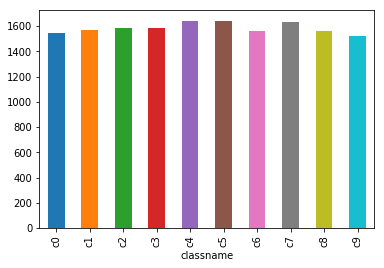

In [13]:
# plotting how the classes are distributed
df_data_final.groupby(df_data["classname"]).count()["img"].plot(kind="bar")

In [18]:
df_data_final["classname"].value_counts()

c5    1643
c4    1640
c7    1635
c3    1585
c2    1584
c1    1567
c8    1563
c6    1562
c0    1550
c9    1526
Name: classname, dtype: int64

In [16]:
# vefify if data count matches with above plot
for c in class_list:
    print('{}: {} images'.format(c, len(os.listdir(os.path.join(out_train_dir, c)))))

c0: 1550 images
c1: 1567 images
c2: 1584 images
c3: 1585 images
c4: 1640 images
c5: 1643 images
c6: 1562 images
c7: 1635 images
c8: 1563 images
c9: 1526 images
